In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#要調用此函數將opencv寫進來的BGR轉成RGB

## 1-1. cluster with only RGB values

In [4]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

1024 1024 3
[[163.23347405 197.76360184 120.59468133]
 [107.86310428  95.71639493  71.72420107]]
[[160.65685586 204.75793192 114.71699171]
 [ 58.45246243  55.26378727  46.16761073]
 [143.98887936 128.35957746  97.28329455]
 [184.02403425 182.83584206 165.04617507]]


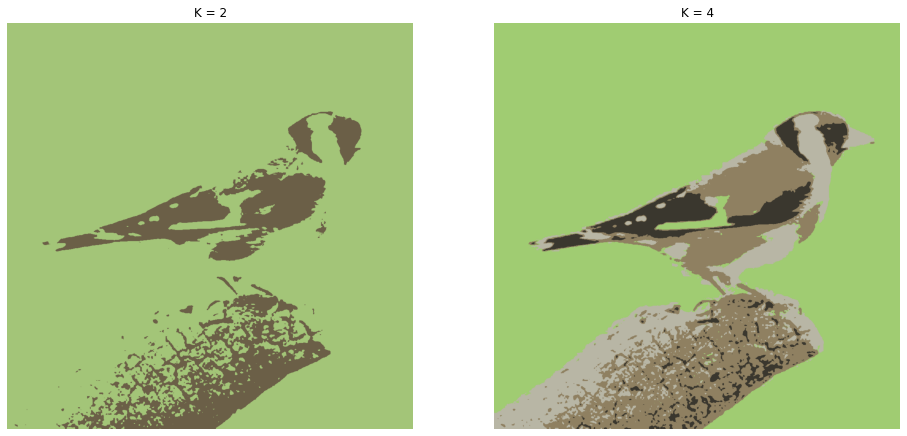

In [5]:
h, w, c = img.shape
print(h,w,c)

Z = img.reshape((-1,3))
#降維度

Ka = [2,4]
plt.figure(figsize=(16,12))

#同時找出位子跟數值
for i, K in enumerate(Ka):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, len(Ka), i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)

# K=2
# #分幾群

# label, center = km_clust(Z,K)

# #中心點，但pxiel不會有小數點，要做資料轉換成unit8
# center=np.uint8(center[:,:3])

# res = center[label.flatten()]
# res = res.reshape(img.shape)
# #label是1的我就取代成163, 197, 120，是0的我就取代成107, 95, 71

# plt.figure(figsize=(16,12))
# plt.title("K={}".format(K))
# plt.imshow(res)

## 1-2. cluster with RGB values and the location

[[154.3901704  186.37822353 116.95805202 511.45158072 256.45699833]
 [156.51263667 180.42752556 110.46296491 511.54878247 768.45608419]]
[[157.34587752 183.2252278  111.43423158 766.04227616 768.55434799]
 [155.59282689 177.61070625 109.44338586 254.34231371 766.12754397]
 [157.15420162 178.99249458 122.87110718 769.30550359 256.40600816]
 [151.70496605 193.79764856 111.17383257 257.02721252 254.30150478]]
[[157.38234849 182.35070186 114.32322434 169.533126   856.24069934]
 [147.22517669 145.29941278 104.48386371 807.61753226 519.42442421]
 [152.21944613 194.4195824  111.85864083 171.64166244 166.71005293]
 [149.18276075 189.30809161 111.07492971 515.07337311 231.39118837]
 [160.15234902 202.7060821  117.79170428 853.0357017  861.58938319]
 [159.41548891 178.62950974 109.17056789 510.0399318  793.44206389]
 [155.70042953 192.185339   110.57575133 216.70293277 511.1215136 ]
 [164.49385072 188.20351792 134.37539787 852.24783775 168.68307031]]
[[161.58296677 188.96147515 114.96664018 128.

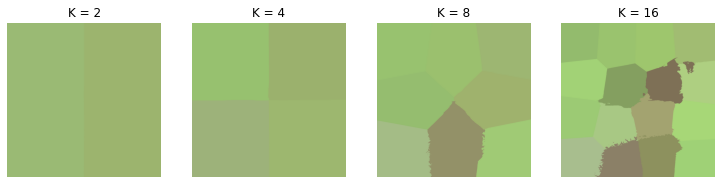

In [8]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16]
plt.figure(figsize=(16,12))

#同時找出位子跟數值
for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[152.80819155 173.94403076 107.98122305 134.11790377 187.12554984]
 [158.4247009  194.09679848 120.19938304 120.83254944  61.03606046]]
[[167.56140583 206.04951495 123.01000557 169.03565361 211.86209985]
 [113.94544203 101.82658984  75.77423641 173.02281252 138.02178876]
 [157.92745959 192.85918643 112.34024047  45.913352   124.02505281]
 [166.09285481 199.58663545 129.69823979 168.44097161  51.59020768]]


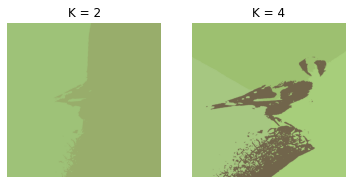

In [10]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4]
plt.figure(figsize=(16,12))

#同時找出位子跟數值
for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()